<a href="https://colab.research.google.com/github/ShaniYamin/Regression-DS/blob/main/Regression_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# assignment - Regression
---
<br>

### Names
Student 1: Shani Yamin 
<br>
Student 2: Noam Meir 

<img src="http://prod-upp-image-read.ft.com/24c17102-16a9-11ea-b869-0971bffac109" width=600px>

### Goodluck!

## Installs and Download the data

In [ ]:
%%capture
!pip install shap
!gdown --id 17mCTI5MWJEldCzI5XMMdA56k-z2IK2op
!unzip /content/data.zip

## Imports
Yes... you don't need to ask for permission... you can add more imports.
This also applies to other text and code cells.

In [ ]:
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Data dictionary
❗❗❗❗ The data dictionary is for you. to explain to you about the different features. It should not be used during the implementation of the assignment!❗❗❗❗

In [ ]:
data_dict = pd.read_excel('/content/data_dictionary.xlsx')
data_dict.head(26)

,Feature Name,Data Type,Explanation
0,Car_ID,Interger,Unique id of each observation (Interger)
1,Symboling,Categorical,"Its assigned insurance risk rating, A value of..."
2,carCompany,Categorical,Name of car company (Categorical)
3,fueltype,Categorical,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Categorical,Aspiration used in a car (Categorical)
5,doornumber,Categorical,Number of doors in a car (Categorical)
6,carbody,Categorical,body of car (Categorical)
7,drivewheel,Categorical,type of drive wheel (Categorical)
8,enginelocation,Categorical,Location of car engine (Categorical)
9,wheelbase,Numeric,Weelbase of car (Numeric)


## Dataset
This is the data set you will use in the assignment ✅

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22.0,17450.0


##Data Cleaning

Drop the irelevant data

In [ ]:
df = df.drop('car_ID',axis = 1)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26.0,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30.0,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22.0,17450.0


Checking non-null values in data-frame and put the mean value of each column

In [ ]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26.0,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30.0,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22.0,17450.0


In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
df_missing_data = pd.concat([total,percent], axis = 1,keys=['Total','Percent'])
df_missing_data.head(15)

,Total,Percent
highwaympg,1,0.487805
horsepower,1,0.487805
boreratio,1,0.487805
symboling,0,0.000000
enginetype,0,0.000000
citympg,0,0.000000
peakrpm,0,0.000000
compressionratio,0,0.000000
stroke,0,0.000000
fuelsystem,0,0.000000


Filling the missing data in the dataset with average

In [ ]:
df['boreratio']=df['boreratio'].fillna(df['boreratio'].mean())
df['highwaympg']=df['highwaympg'].fillna(df['highwaympg'].mean())
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [ ]:
# df['symboling'] = df['symboling'].astype(str)
# df.symboling.describe()

Renaming the typo errors in Car Names

In [ ]:
df['CarName'] = df["CarName"].str.split(' ', expand=True)[0]
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26.0,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30.0,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22.0,17450.0


In [ ]:
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda','alfa-romero':'Alfa-Romeo', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
df.CarName.unique()

array(['Alfa-Romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df.loc[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


##Exploratory Data Analysis


Plotting the Price of all the cars in the dataset

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


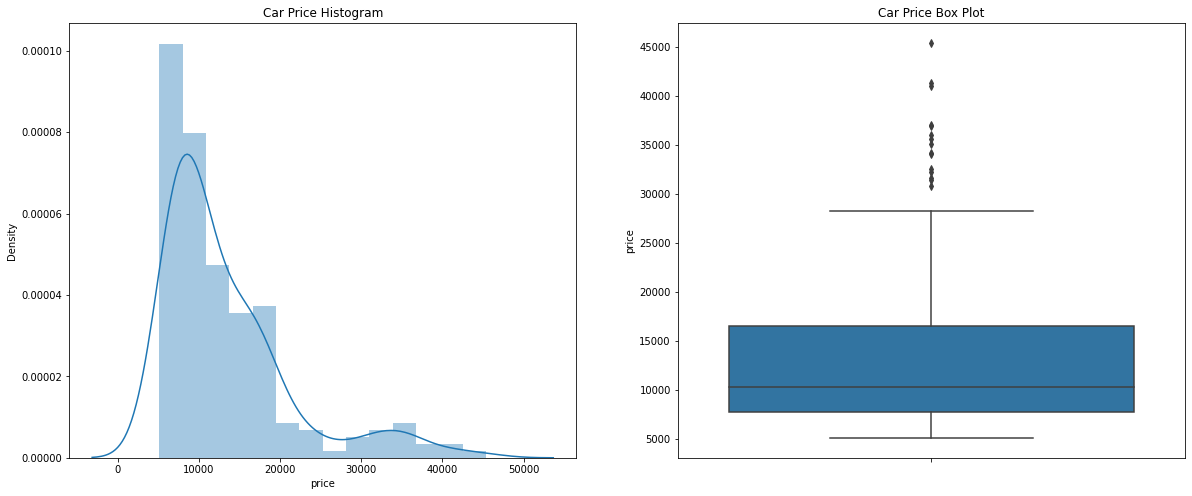

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Price Histogram')
sns.distplot(df.price)
plt.subplot(1,2,2)
plt.title('Car Price Box Plot')
sns.boxplot(y=df.price)
plt.show()

In [ ]:
print(df.price.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


Visualizing numeric variables and scatter plots for all numerical columns to check what category has a positive correlation with price.

In [ ]:
numCols = df.select_dtypes(include=['int64','float'])
numCols = numCols[sorted(numCols.columns)]
print(numCols.columns)

Index(['boreratio', 'carheight', 'carlength', 'carwidth', 'citympg',
       'compressionratio', 'curbweight', 'enginesize', 'highwaympg',
       'horsepower', 'peakrpm', 'price', 'stroke', 'symboling', 'wheelbase'],
      dtype='object')


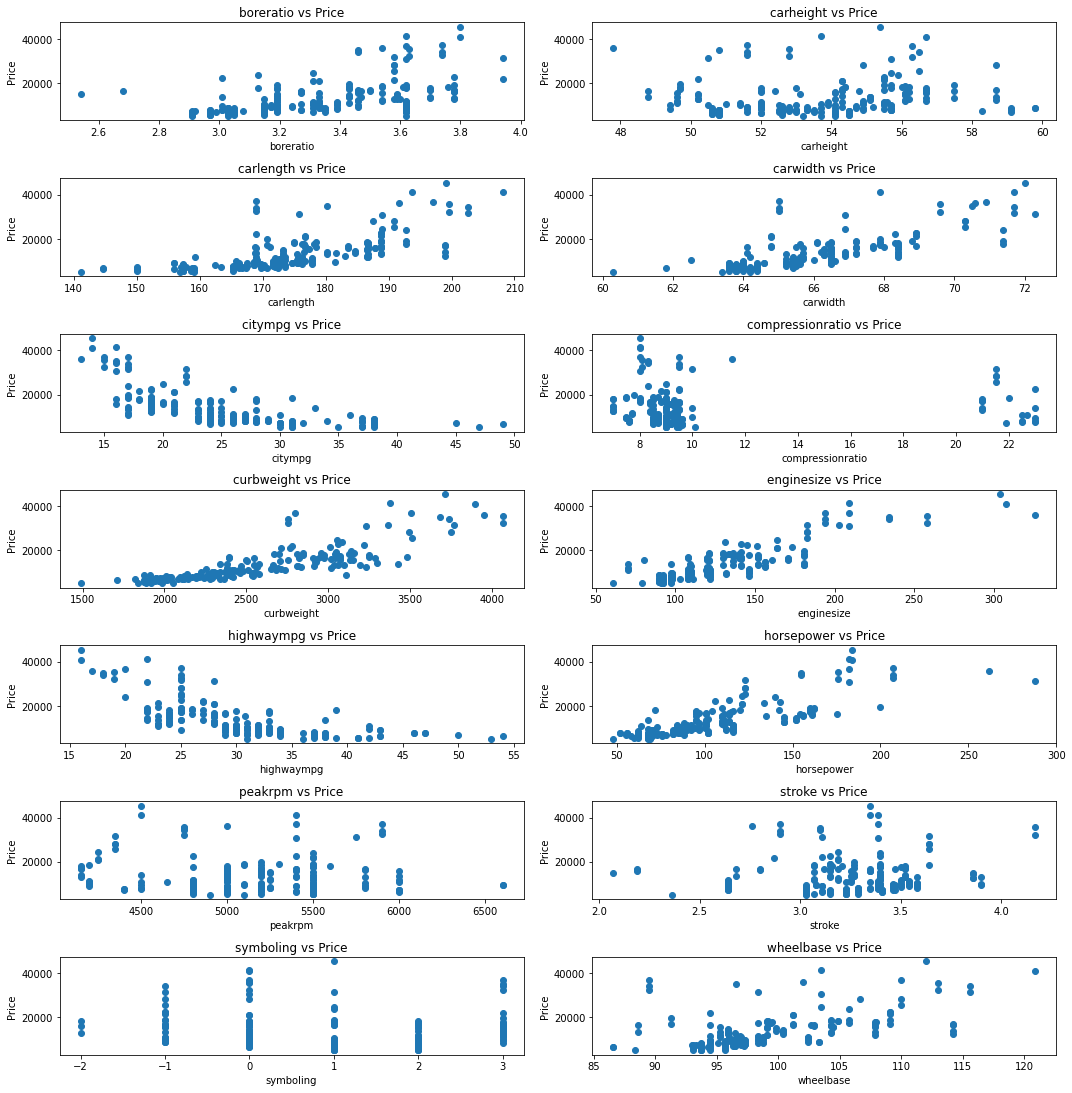

In [ ]:
plt.figure(figsize=(15,30))
numCols = numCols.drop('price',axis=1)
for i in range(len(numCols.columns)):
  plt.subplot(len(numCols.columns),2,i+1)
  plt.scatter(df[numCols.columns[i]],df['price'])
  plt.title(numCols.columns[i]+' vs Price')
  plt.ylabel('Price')
  plt.xlabel(numCols.columns[i])

plt.tight_layout()

 Visualizing categorical variables with the histogram and boxplots for all categorical columns

In [ ]:
df['price'] = df['price'].astype('int')
dataFrame = df.copy()
table = df.groupby(['CarName'])['price'].mean()
dataFrame = dataFrame.merge(table.reset_index(),how='left',on='CarName')
bins = [0,10000,20000,46000]
cars_bin=['LowEnd','MediumEnd','HighEnd']
df['carprice_category'] = pd.cut(dataFrame['price_y'],bins,right=False,labels=cars_bin)
df.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carprice_category
0,3,Alfa-Romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,13495,MediumEnd
1,3,Alfa-Romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,16500,MediumEnd
2,1,Alfa-Romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000,19,26.0,16500,MediumEnd
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500,24,30.0,13950,MediumEnd
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500,18,22.0,17450,MediumEnd


In [ ]:
categCols=df.select_dtypes(exclude=['int64','float64'])
categCols=categCols[sorted(categCols.columns)]
print(categCols.columns)

Index(['CarName', 'aspiration', 'carbody', 'carprice_category',
       'cylindernumber', 'doornumber', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'fueltype'],
      dtype='object')


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data

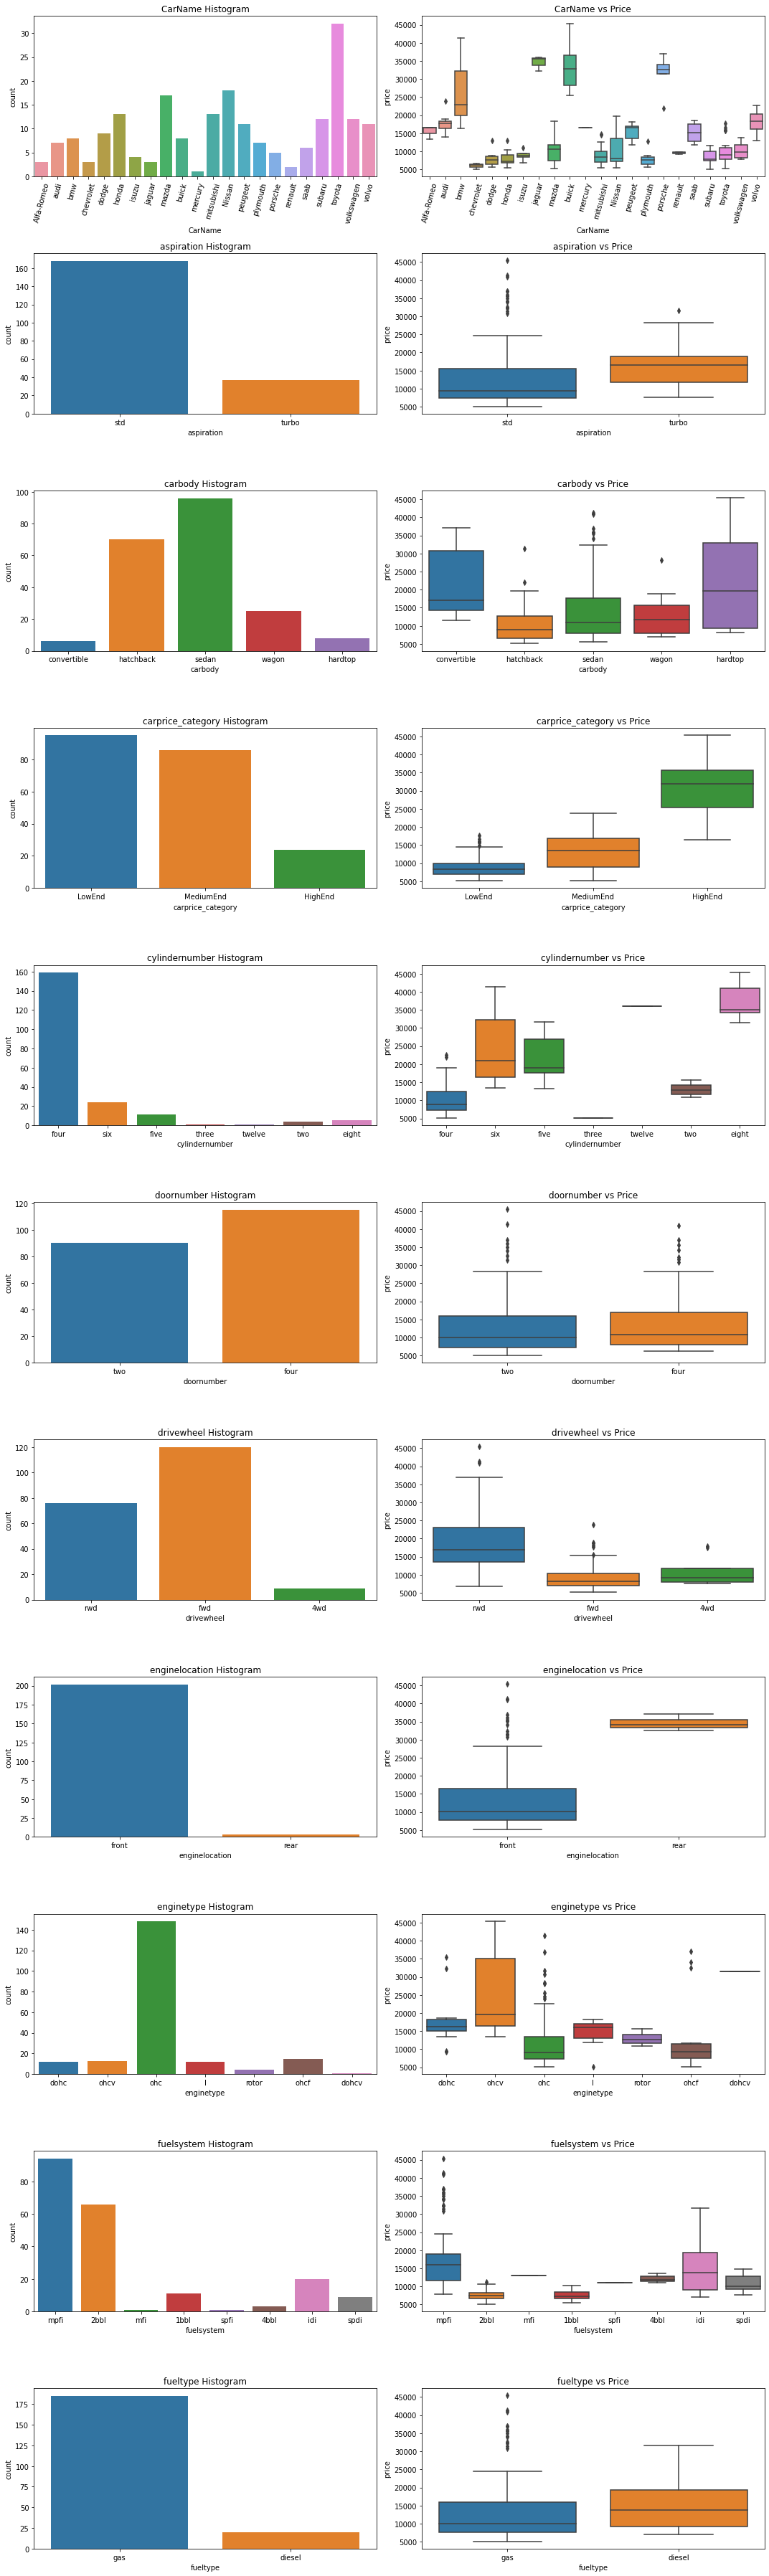

In [ ]:
plt.figure(figsize=(15,50))
n=0
for i in range(len(categCols.columns)):
  n+=1
  plt.subplot(len(categCols.columns),2,n)
  sns.countplot(df[categCols.columns[i]])
  if categCols.columns[i]=='CarName':
    plt.xticks(rotation=75)
  else:
    plt.xticks(rotation=0)
  plt.title(categCols.columns[i]+' Histogram')
  n+=1
  plt.subplot(len(categCols.columns),2,n)
  sns.boxplot(x=df[categCols.columns[i]],y=df.price)
  plt.title(categCols.columns[i]+' vs Price')
  if categCols.columns[i]=='CarName':
    plt.xticks(rotation=75)
  else:
    plt.xticks(rotation=0)
plt.tight_layout()

Bivariate analysis. There are 2 columns that have the MPG listed for each car. We compute the average fuel economy of a car.

In [ ]:
df['fuel_economy']=(0.55*df['citympg']) + ( 0.45 *df['highwaympg'])
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carprice_category,fuel_economy
0,3,Alfa-Romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000,21,27.0,13495,MediumEnd,23.70
1,3,Alfa-Romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000,21,27.0,16500,MediumEnd,23.70
2,1,Alfa-Romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000,19,26.0,16500,MediumEnd,22.15
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500,24,30.0,13950,MediumEnd,26.70
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500,18,22.0,17450,MediumEnd,19.80


Checking Fuel Economy w.r.t Price and Carprice Category

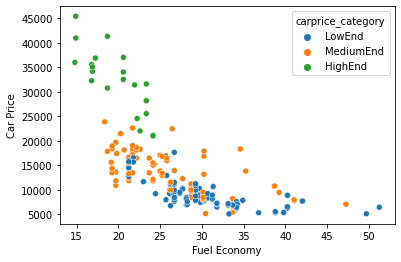

In [ ]:
plt1=sns.scatterplot(x='fuel_economy',y='price',hue='carprice_category',data=df)
plt1.set_xlabel('Fuel Economy')
plt1.set_ylabel('Car Price')
plt.show()

Checking Horsepower w.r.t Price and Carprice Category

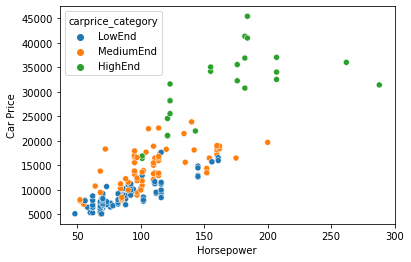

In [ ]:
plt2=sns.scatterplot(x='horsepower',y='price',hue='carprice_category',data=df)
plt2.set_xlabel('Horsepower')
plt2.set_ylabel('Car Price')
plt.show()

Checking Car Length w.r.t Price and Carprice Category

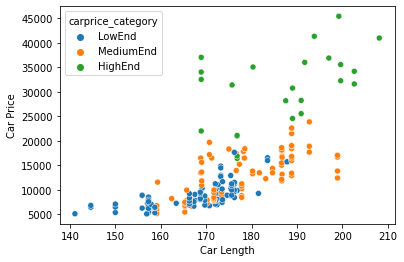

In [ ]:
plt3=sns.scatterplot(x='carlength',y='price',hue='carprice_category',data=df)
plt3.set_xlabel('Car Length')
plt3.set_ylabel('Car Price')
plt.show()

Figure out if we can perform linear regression not on our dataset

Create a new dataframe with our above mentioned significant variables on which we will start the process of building our model.

In [ ]:
dfprice_lr = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower','fuel_economy', 'carlength','carwidth', 'carprice_category','CarName']]
dfprice_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fuel_economy,carlength,carwidth,carprice_category,CarName
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111.0,23.70,168.8,64.1,MediumEnd,Alfa-Romeo
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111.0,23.70,168.8,64.1,MediumEnd,Alfa-Romeo
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154.0,22.15,171.2,65.5,MediumEnd,Alfa-Romeo
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102.0,26.70,176.6,66.2,MediumEnd,audi
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115.0,19.80,176.6,66.4,MediumEnd,audi


Visualizing chosen numeric variables.
Create pairplot of all the numeric variables of our chosen dataset to figure out if we can perform linear regression or not on the dataset.

<Figure size 1080x1080 with 0 Axes>

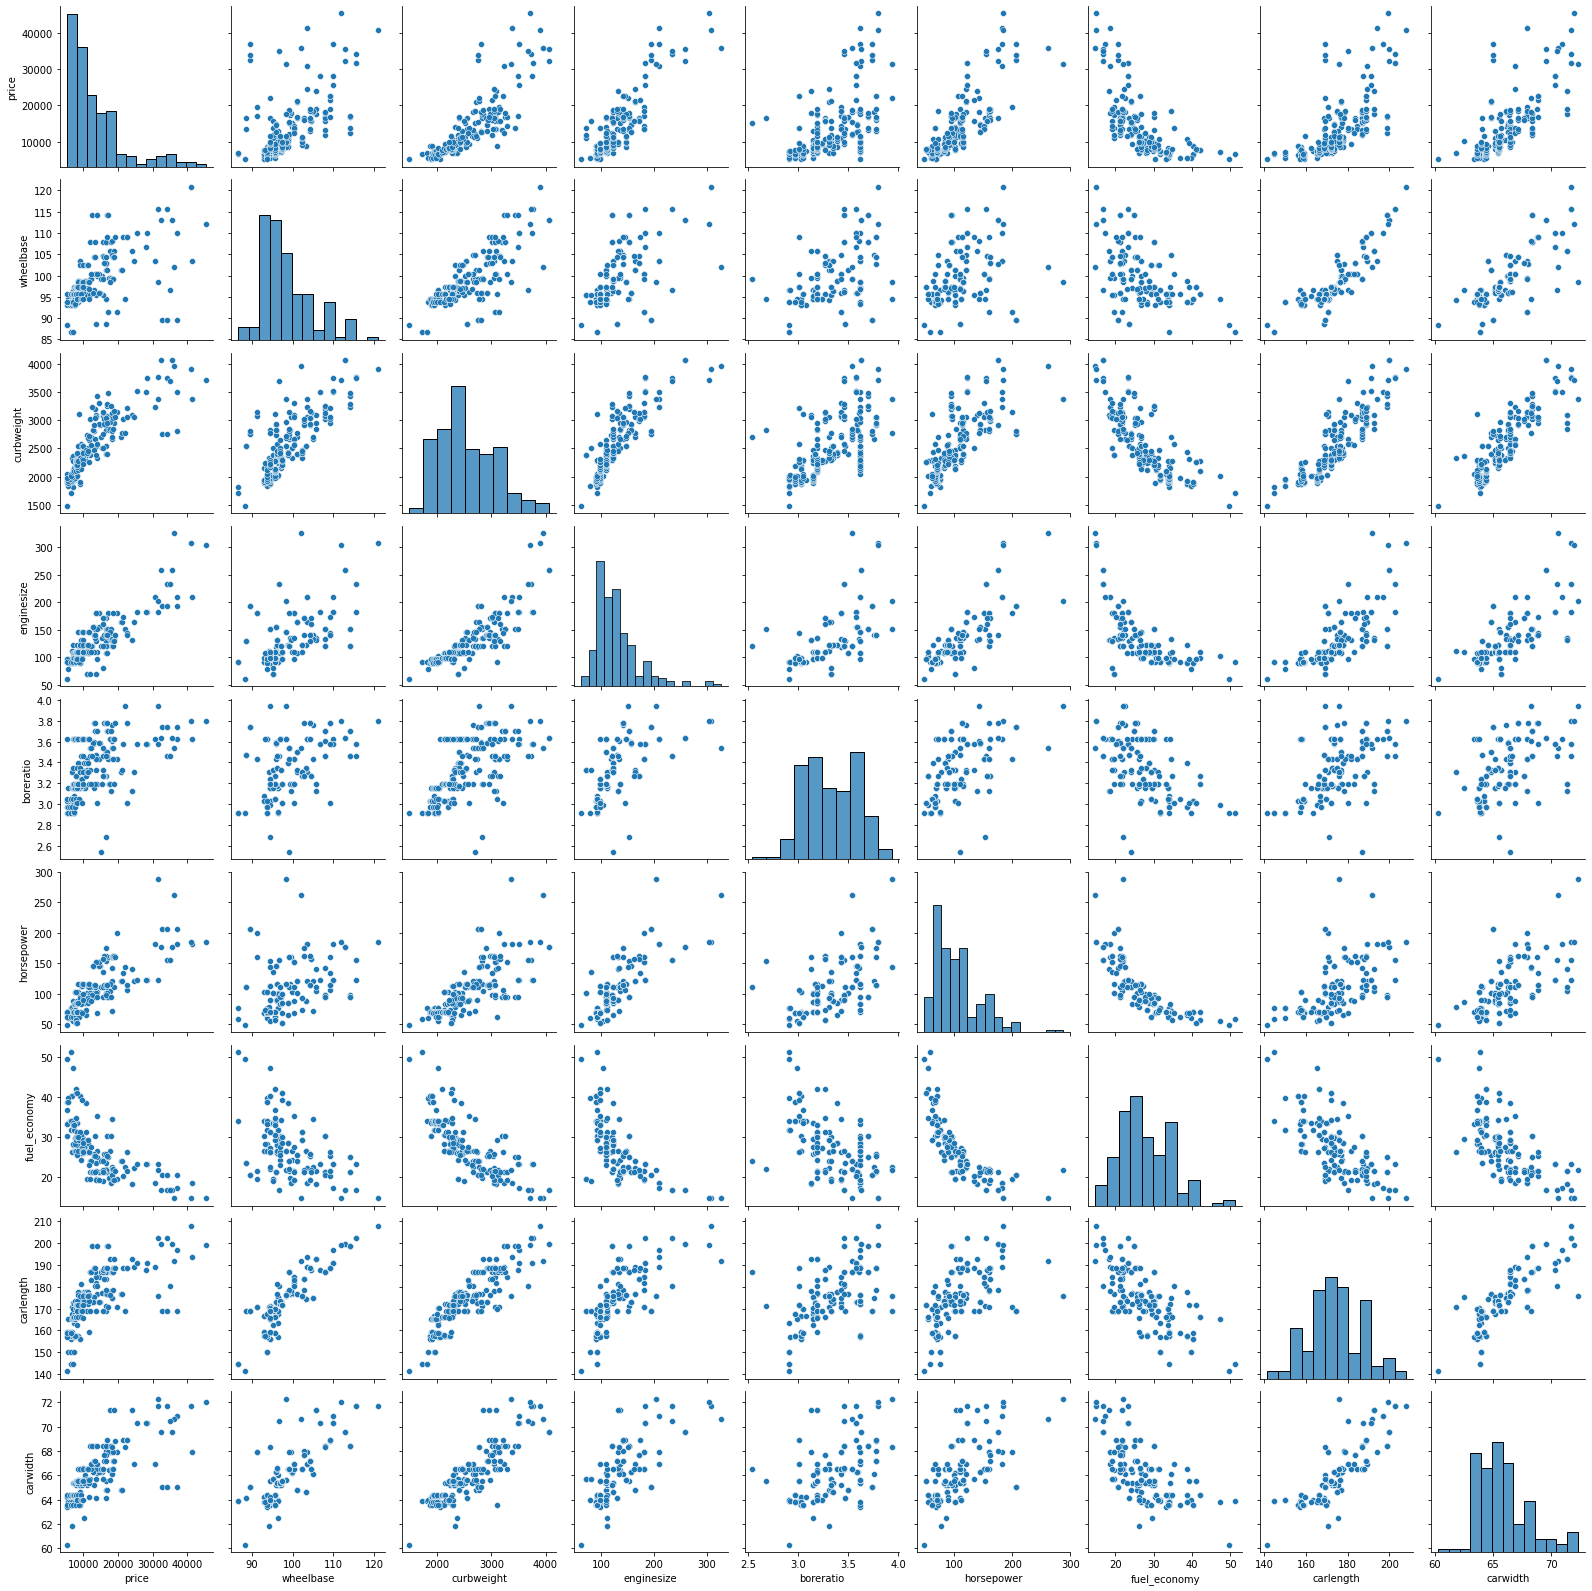

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(dfprice_lr)
plt.show()

#Convert string to labels

For the categorical variables, we would have to convert them into numeric number.

In [ ]:
colNames=set(categCols.columns.values)
labelEncoder=LabelEncoder()
colNames=colNames & set(dfprice_lr.columns)
for i,value in enumerate(colNames):
  rowSet = set(categCols[value].copy()) 
  name=value+' label'
  ww=pd.Series(labelEncoder.fit_transform(dfprice_lr[value]))
  ww.rename(name,inplace=True)
  dfprice_lr=pd.concat([dfprice_lr,pd.Series(ww)],names=[value,name],axis=1)

dfprice_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,...,carprice_category,CarName,CarName label,cylindernumber label,fueltype label,carbody label,carprice_category label,aspiration label,enginetype label,drivewheel label
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,MediumEnd,Alfa-Romeo,0,2,1,0,2,0,0,2
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,MediumEnd,Alfa-Romeo,0,2,1,0,2,0,0,2
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,...,MediumEnd,Alfa-Romeo,0,3,1,2,2,0,5,2
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,...,MediumEnd,audi,2,2,1,3,2,0,3,1
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,...,MediumEnd,audi,2,1,1,3,2,0,3,0


In [ ]:
dfprice_lr.columns

Index(['price', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio',
       'horsepower', 'fuel_economy', 'carlength', 'carwidth',
       'carprice_category', 'CarName', 'CarName label', 'cylindernumber label',
       'fueltype label', 'carbody label', 'carprice_category label',
       'aspiration label', 'enginetype label', 'drivewheel label'],
      dtype='object')

#Split data to test and train

In [ ]:
np.random.seed(0)
dfprice_lr = dfprice_lr[['price','carlength','carwidth','boreratio','curbweight','horsepower','enginesize']]
df_train,df_test = train_test_split(dfprice_lr,train_size = 0.7 , test_size =0.3 ,random_state = 100)
df_train.shape
df_train_scaling,df_test_scaling = df_train.copy() , df_test.copy()

In [ ]:
df_test.shape

(62, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Rescaling the features with MinMaxScaler 

In [ ]:
num_vars =['price','carlength','carwidth','boreratio','curbweight','horsepower','enginesize']
df_train_scaling[num_vars] = scaler.fit_transform(df_train_scaling[num_vars])
df_test_scaling[num_vars] = scaler.fit_transform(df_test_scaling[num_vars])
df_train_scaling.head()

,price,carlength,carwidth,boreratio,curbweight,horsepower,enginesize
122,0.068818,0.426016,0.291667,0.230159,0.272692,0.083333,0.139623
125,0.466890,0.452033,0.666667,1.000000,0.500388,0.395833,0.339623
166,0.122110,0.448780,0.308333,0.444444,0.314973,0.266667,0.139623
1,0.314446,0.450407,0.316667,0.626984,0.411171,0.262500,0.260377
199,0.382131,0.775610,0.575000,0.746032,0.647401,0.475000,0.260377


In [ ]:
df_train_scaling.describe()

,price,carlength,carwidth,boreratio,curbweight,horsepower,enginesize
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.525476,0.461655,0.498057,0.407878,0.227130,0.241351
std,0.215682,0.204848,0.184517,0.207146,0.211269,0.165492,0.154619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.399187,0.304167,0.305556,0.245539,0.091667,0.135849
50%,0.140343,0.502439,0.425000,0.500000,0.355702,0.191667,0.184906
75%,0.313479,0.669919,0.550000,0.682540,0.559542,0.283333,0.301887
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the correlation coefficients to see which chosen variables are highly correlated

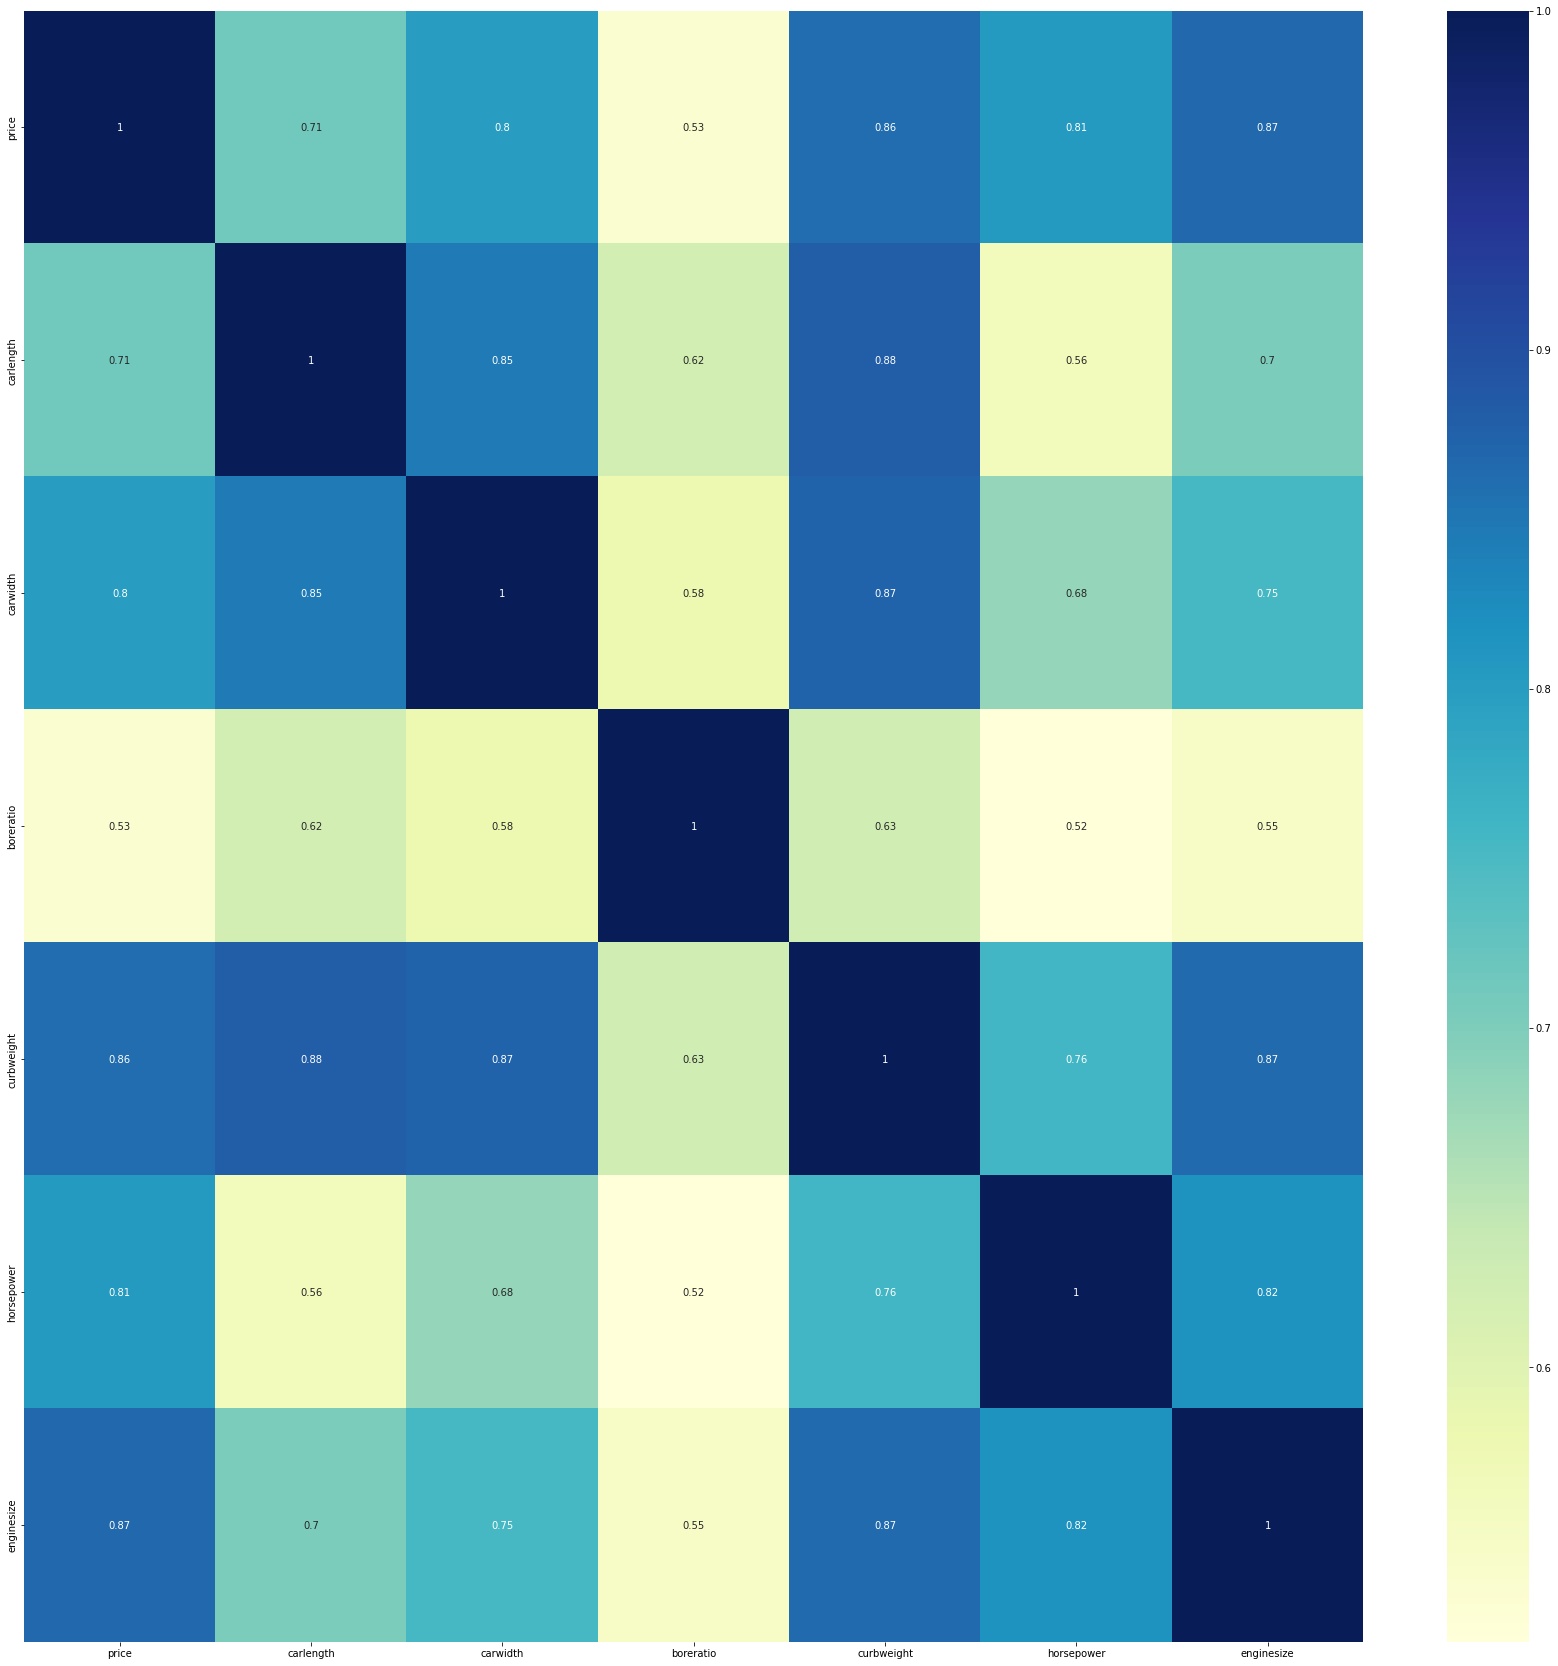

In [ ]:
plt.figure(figsize = (30,30))
sns.heatmap(df_train_scaling.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
df_train.describe()

,price,carlength,carwidth,boreratio,curbweight,horsepower,enginesize
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,13056.335664,173.416783,65.839860,3.307551,2539.510490,102.511107,124.958042
std,7807.031621,12.598122,2.214203,0.261003,544.650539,39.718021,40.974034
min,5118.000000,141.100000,60.300000,2.680000,1488.000000,48.000000,61.000000
25%,7554.000000,165.650000,63.950000,3.065000,2121.000000,70.000000,97.000000
50%,10198.000000,172.000000,65.400000,3.310000,2405.000000,94.000000,110.000000
75%,16465.000000,182.300000,66.900000,3.540000,2930.500000,116.000000,141.000000
max,41315.000000,202.600000,72.300000,3.940000,4066.000000,288.000000,326.000000


#Split data to labels and data(x and y)

In [ ]:
y_train = df_train.pop('price')
x_train = df_train.copy()
y_test = df_test.pop('price')
x_test = df_test.copy()
y_train_scaling = df_train_scaling.pop('price')
x_train_scaling = df_train_scaling.copy()
y_test_scaling = df_test_scaling.pop('price')
x_test_scaling = df_test_scaling.copy()

In [ ]:
x_train = x_train.select_dtypes(include=['int64','float'])
x_test = x_test.select_dtypes(include=['int64','float'])
x_train_scaling = x_train_scaling.select_dtypes(include=['int64','float'])
x_test_scaling = x_test_scaling.select_dtypes(include=['int64','float'])

#Linear Regression

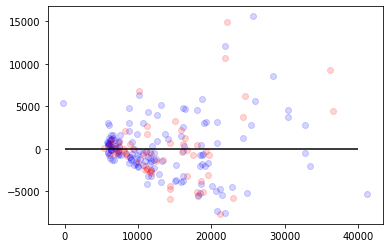

In [ ]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)
pred_train_lin = lreg.predict(x_train)
pred_test_lin = lreg.predict(x_test)
plt.scatter(pred_train_lin,y_train-pred_train_lin,c='b',alpha=0.17)
plt.scatter(pred_test_lin,y_test-pred_test_lin,c='r',alpha=0.17)
plt.hlines(y=0,xmin=0,xmax=40000)

In [ ]:
print("R^2 score for train",r2_score(y_train,pred_train_lin))
print("R^2 score for test",r2_score(y_test,pred_test_lin))

R^2 score for train 0.8284417183040439
R^2 score for test 0.7894393830998673


#Random Forest Regression

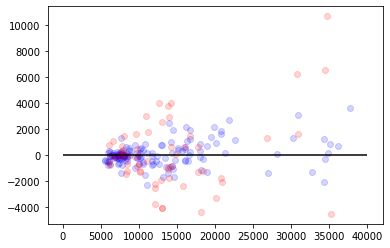

In [ ]:
lreg = RandomForestRegressor(n_estimators=100)
lreg.fit(x_train,y_train)
pred_train_lin = lreg.predict(x_train)
pred_test_lin = lreg.predict(x_test)
plt.scatter(pred_train_lin,y_train-pred_train_lin,c='b',alpha=0.17)
plt.scatter(pred_test_lin,y_test-pred_test_lin,c='r',alpha=0.17)
plt.hlines(y=0,xmin=0,xmax=40000)

In [ ]:
print("R^2 score for train",r2_score(y_train,pred_train_lin))
print("R^2 score ",r2_score(y_test,pred_test_lin))

R^2 score for train 0.9859771490981755
R^2 score  0.9013031530029261


#Support Vector Regression

In [ ]:
svr=SVR()
svr.fit(x_train_scaling ,y_train_scaling)
print("training set score : {}".format(svr.score(x_train_scaling, y_train_scaling)))
print("training set score : {}".format(svr.score(x_test_scaling, y_test_scaling)))
y_pred1=svr.predict(x_test_scaling)

training set score : 0.8959576235696649
training set score : 0.4001475802238035


In [ ]:
from sklearn.model_selection import GridSearchCV
svr1=SVR()
paras={'C':[0.001, 0.1, 1, 2, 5 ,10, 100],
      'degree':[1,2,3,4,5,6,7],
      'gamma':[0.001, 0.1, 1,2 ,5, 10, 100]}

gridsearch=GridSearchCV(estimator=svr,param_grid=paras, cv=10, n_jobs=-1)
gridsearch.fit(x_train_scaling,y_train_scaling)
gridsearch.best_params_

{'C': 2, 'degree': 1, 'gamma': 0.1}

In [ ]:
svr=SVR(C=2, degree=1, gamma=0.1)
svr.fit(x_train_scaling ,y_train_scaling)
print("training set score : {}".format(svr.score(x_train_scaling, y_train_scaling)))
print("testing set score : {}".format(svr.score(x_test_scaling, y_test_scaling)))
y_pred2=svr.predict(x_test_scaling)

training set score : 0.8251524083574576
testing set score : 0.7828171678226802


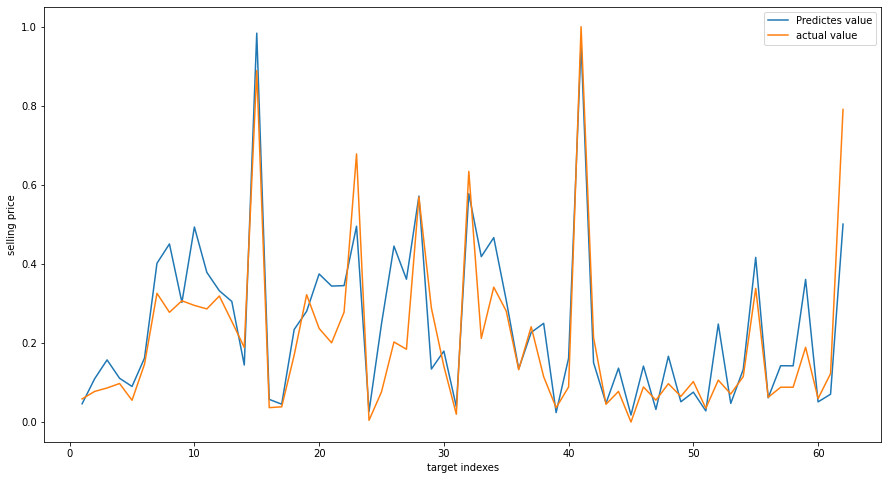

In [ ]:
plt.figure(figsize=(15,8))
index=range(1, len(y_pred2)+1)
plt.plot(index, y_pred2, label='Predictes value')
plt.plot(index, y_test_scaling, label='actual value')
plt.legend()
plt.xlabel('target indexes')
plt.ylabel('selling price')
plt.show()

In [ ]:
print("R^2 score ",r2_score(y_test_scaling,y_pred2))

R^2 score  0.7828171678226802


#Model analyst

In [ ]:
shap.initjs()

###Feature Importances

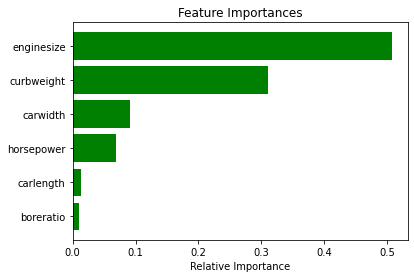

[ 1.28898063  9.15186673  0.94708744 30.98556994  6.92182154 50.70467372]


In [ ]:
importances = lreg.feature_importances_
indices = np.argsort(importances)
features = ['carlength','carwidth','boreratio','curbweight','horsepower','enginesize']
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
print(importances*100)

In [ ]:
explainer = shap.TreeExplainer(lreg)
shap_values = explainer.shap_values(x_train)

###Average impact for each feature on model

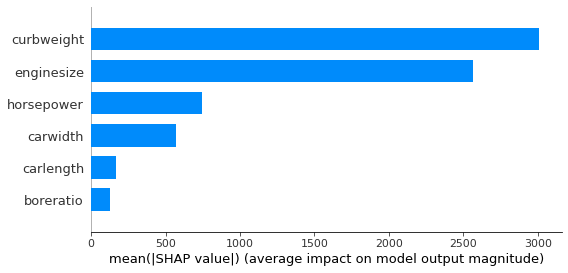

In [ ]:
shap.summary_plot(shap_values, x_train, feature_names=features, plot_type="bar")

###Feature impact on model

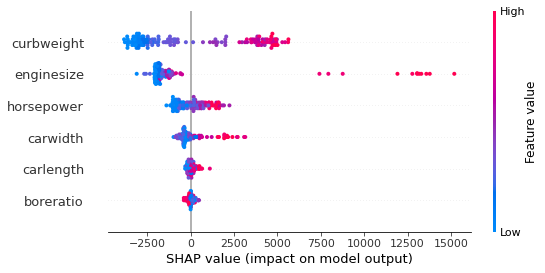

In [ ]:
shap.summary_plot(shap_values, x_train, feature_names=features)

###Effects of each feature on the price in Waterfall Plot

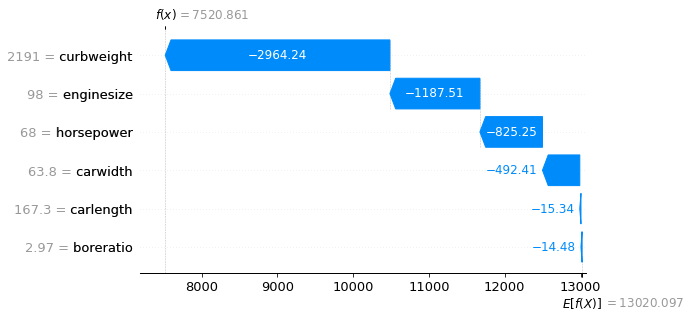

In [ ]:
from shap import waterfall_plot,Explainer, Explanation

explainer1 = shap.Explainer(lreg,x_train)
shape_values = explainer1(x_train)
shap.plots.waterfall(shape_values[0])

###Effects of each feature on the price in decision plot

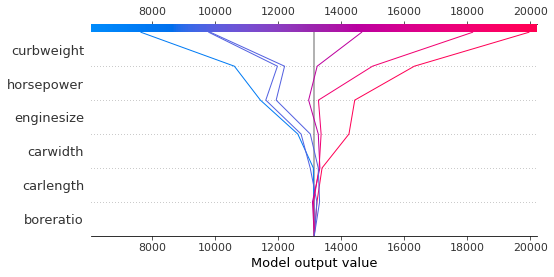

In [ ]:
shap.initjs()
shap.decision_plot(explainer.expected_value, shape_values.values[0:6,:], feature_names = list(features))

#Conclusion

#part 1

**Linear Regression.** The R2 score of traning set is 0.82 and the test set is 0.78 which not good enough to predict car price.

**Random** **Forest** **Regression.**
The R2 score of traning set is 0.98 and the test set is 0.90 which is quite close and have the best prediction to predict car price.

**Random Forest Regression.** 
 The R2 score of traning set is 0.82 and the test set is 0.78 which not good enough to predict car price.

We thought the Linear Regression would be higher than the Random Forest Regression and were wrong. 
The feature we thought contributed to success is:

1.   curbweight
2.   carlength
3.   enginesize
4.   horsepower


#part 2

According to our study, Random Forest Regression has the best prediction so we analyzed our conclusion under this algorithm

The important features to predict the car price are

1.   engine size- 50.7%
2.   curb weight-30.98%
3.   boreratio-9.47%
4.   car width-9.15%
5.   horse power-6.92%
6.   car length-1.28%

These features by themselves do not describe the car price but by giving a rate to the important features joined together are predicting the car price.
In the decision plot, we can see the gradient step for each feature and its impact.